# ProbelmSet 3
### Part 1  
MACS 30200 

Mengchen Shi  
May 15, 2018

In [100]:
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
random.seed(1234)
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

In [2]:
from keras.datasets import mnist

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [80]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [81]:
images_train, images_val, labels_train, labels_val = train_test_split(\
                                                train_images, train_labels, test_size=1/6)

In [85]:
images_val.shape

(10000, 28, 28)

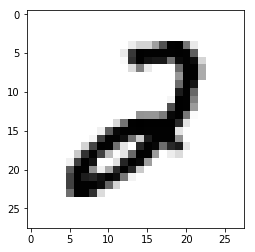

In [69]:
digit = images_train[4]
plt.imshow(digit, cmap=plt.cm.binary)

## i. Initial test

In [7]:
from keras import models
from keras import layers

In [105]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [86]:
images_train = images_train.reshape((50000, 28*28))
images_train = images_train.astype('float32')/255

images_val = images_val.reshape((10000, 28*28))
images_val = images_val.astype('float32')/255

In [35]:
from keras.utils import to_categorical

labels_train = to_categorical(labels_train)
labels_val = to_categorical(labels_val)

In [15]:
#network.fit(images_train, labels_train, epochs=200, batch_size=512)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2550 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1038 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0678 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0494 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.0372 - acc: 0.9887


In [104]:
test_loss, test_acc = network.evaluate(images_val, labels_val)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 104us/step
test_acc: 0.9862


In [106]:
history = network.fit(images_train, labels_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(images_val, labels_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 10s 191us/step - loss: 0.5115 - acc: 0.8392 - val_loss: 0.1649 - val_acc: 0.9487
Epoch 2/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.1694 - acc: 0.9495 - val_loss: 0.1185 - val_acc: 0.9649
Epoch 3/200
50000/50000 [==============================] - 9s 173us/step - loss: 0.0986 - acc: 0.9711 - val_loss: 0.1635 - val_acc: 0.9602
Epoch 4/200
50000/50000 [==============================] - 9s 176us/step - loss: 0.0685 - acc: 0.9790 - val_loss: 0.0923 - val_acc: 0.9742
Epoch 5/200
50000/50000 [==============================] - 9s 176us/step - loss: 0.0483 - acc: 0.9849 - val_loss: 0.1339 - val_acc: 0.9647
Epoch 6/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.0344 - acc: 0.9888 - val_loss: 0.1028 - val_acc: 0.9753
Epoch 7/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.0290 - acc: 0.9918 - val_loss: 0

50000/50000 [==============================] - 8s 166us/step - loss: 0.0064 - acc: 0.9990 - val_loss: 0.2006 - val_acc: 0.9796
Epoch 60/200
50000/50000 [==============================] - 8s 161us/step - loss: 0.0064 - acc: 0.9991 - val_loss: 0.1975 - val_acc: 0.9809
Epoch 61/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0084 - acc: 0.9988 - val_loss: 0.1732 - val_acc: 0.9823
Epoch 62/200
50000/50000 [==============================] - 9s 172us/step - loss: 0.0043 - acc: 0.9994 - val_loss: 0.2031 - val_acc: 0.9805
Epoch 63/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.0064 - acc: 0.9991 - val_loss: 0.1873 - val_acc: 0.9811
Epoch 64/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0050 - acc: 0.9991 - val_loss: 0.1864 - val_acc: 0.9814
Epoch 65/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0088 - acc: 0.9986 - val_loss: 0.1773 - val_acc: 0.9817
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 8s 156us/step - loss: 0.0056 - acc: 0.9993 - val_loss: 0.2242 - val_acc: 0.9819
Epoch 118/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.2128 - val_acc: 0.9820
Epoch 119/200
50000/50000 [==============================] - 8s 157us/step - loss: 0.0069 - acc: 0.9989 - val_loss: 0.1939 - val_acc: 0.9817
Epoch 120/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0066 - acc: 0.9992 - val_loss: 0.2066 - val_acc: 0.9816
Epoch 121/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0075 - acc: 0.9991 - val_loss: 0.2052 - val_acc: 0.9811
Epoch 122/200
50000/50000 [==============================] - 8s 157us/step - loss: 0.0063 - acc: 0.9994 - val_loss: 0.2046 - val_acc: 0.9820
Epoch 123/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.0060 - acc: 0.9991 - val_loss: 0.2147 - val_acc: 0.9799
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 8s 154us/step - loss: 0.0042 - acc: 0.9994 - val_loss: 0.2205 - val_acc: 0.9804
Epoch 176/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.0075 - acc: 0.9993 - val_loss: 0.2130 - val_acc: 0.9824
Epoch 177/200
50000/50000 [==============================] - 1320s 26ms/step - loss: 0.0078 - acc: 0.9992 - val_loss: 0.2268 - val_acc: 0.9818
Epoch 178/200
50000/50000 [==============================] - 9s 186us/step - loss: 0.0119 - acc: 0.9989 - val_loss: 0.2021 - val_acc: 0.9825
Epoch 179/200
50000/50000 [==============================] - 9s 187us/step - loss: 0.0083 - acc: 0.9990 - val_loss: 0.2085 - val_acc: 0.9803
Epoch 180/200
50000/50000 [==============================] - 9s 179us/step - loss: 0.0041 - acc: 0.9995 - val_loss: 0.2234 - val_acc: 0.9820
Epoch 181/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.0068 - acc: 0.9994 - val_loss: 0.2349 - val_acc: 0.9813
Epoch 182/200
50000/50000

In [107]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [108]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc)+1)

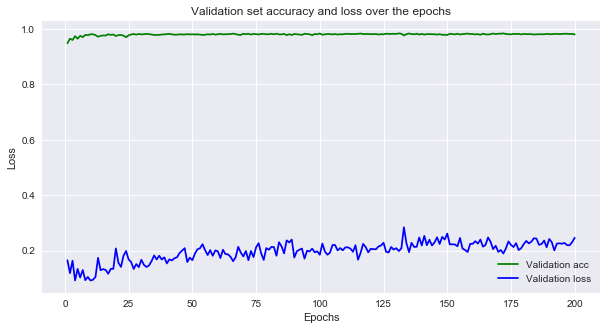

In [118]:
#plt.plot(epochs, acc, 'bo', label='Training acc')
plt.figure(figsize=(10,5))
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Validation set accuracy and loss over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [160]:
history_dict['val_loss'][0:20]

[0.1648671369075775,
 0.11854175570011138,
 0.16346209988594054,
 0.0922513352394104,
 0.13390016016960143,
 0.10278527448177338,
 0.129945836520195,
 0.09327760471105576,
 0.10475473802089691,
 0.09228914015293121,
 0.09454281733632088,
 0.10502708977460862,
 0.17372774798870086,
 0.12919770591259003,
 0.13334597294330597,
 0.1301003769159317,
 0.11643558349609374,
 0.13421044430732726,
 0.13429226541519165,
 0.20782822079658508]

### The model's performance degrades when epoch is around 7 to 9.

## ii. Implement dropout

In [161]:
network2 = models.Sequential()

network2.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(512, activation='relu'))
network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [162]:
history2 = network2.fit(images_train, labels_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(images_val, labels_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 14s 283us/step - loss: 0.7306 - acc: 0.7583 - val_loss: 0.2232 - val_acc: 0.9324
Epoch 2/200
50000/50000 [==============================] - 13s 261us/step - loss: 0.2724 - acc: 0.9211 - val_loss: 0.1473 - val_acc: 0.9572
Epoch 3/200
50000/50000 [==============================] - 12s 242us/step - loss: 0.2005 - acc: 0.9422 - val_loss: 0.1176 - val_acc: 0.9647
Epoch 4/200
50000/50000 [==============================] - 13s 254us/step - loss: 0.1662 - acc: 0.9533 - val_loss: 0.1091 - val_acc: 0.9692
Epoch 5/200
50000/50000 [==============================] - 13s 262us/step - loss: 0.1413 - acc: 0.9611 - val_loss: 0.1062 - val_acc: 0.9702
Epoch 6/200
50000/50000 [==============================] - 16s 313us/step - loss: 0.1280 - acc: 0.9641 - val_loss: 0.1038 - val_acc: 0.9712
Epoch 7/200
50000/50000 [==============================] - 21s 428us/step - loss: 0.1146 - acc: 0.9676 - val_l

Epoch 59/200
50000/50000 [==============================] - 16s 323us/step - loss: 0.0539 - acc: 0.9892 - val_loss: 0.1123 - val_acc: 0.9820
Epoch 60/200
50000/50000 [==============================] - 16s 324us/step - loss: 0.0526 - acc: 0.9895 - val_loss: 0.1119 - val_acc: 0.9812
Epoch 61/200
50000/50000 [==============================] - 17s 331us/step - loss: 0.0484 - acc: 0.9900 - val_loss: 0.1077 - val_acc: 0.9825
Epoch 62/200
50000/50000 [==============================] - 16s 324us/step - loss: 0.0528 - acc: 0.9893 - val_loss: 0.1100 - val_acc: 0.9815
Epoch 63/200
50000/50000 [==============================] - 16s 325us/step - loss: 0.0482 - acc: 0.9905 - val_loss: 0.1149 - val_acc: 0.9826
Epoch 64/200
50000/50000 [==============================] - 16s 323us/step - loss: 0.0529 - acc: 0.9899 - val_loss: 0.1167 - val_acc: 0.9824
Epoch 65/200
50000/50000 [==============================] - 16s 323us/step - loss: 0.0496 - acc: 0.9904 - val_loss: 0.1208 - val_acc: 0.9819
Epoch 66/200


Epoch 117/200
50000/50000 [==============================] - 19s 371us/step - loss: 0.0617 - acc: 0.9908 - val_loss: 0.1348 - val_acc: 0.9817
Epoch 118/200
50000/50000 [==============================] - 18s 367us/step - loss: 0.0581 - acc: 0.9918 - val_loss: 0.1375 - val_acc: 0.9830
Epoch 119/200
50000/50000 [==============================] - 18s 369us/step - loss: 0.0672 - acc: 0.9898 - val_loss: 0.1324 - val_acc: 0.9838
Epoch 120/200
50000/50000 [==============================] - 18s 362us/step - loss: 0.0585 - acc: 0.9909 - val_loss: 0.1342 - val_acc: 0.9831
Epoch 121/200
50000/50000 [==============================] - 18s 368us/step - loss: 0.0571 - acc: 0.9920 - val_loss: 0.1467 - val_acc: 0.9821
Epoch 122/200
50000/50000 [==============================] - 18s 363us/step - loss: 0.0670 - acc: 0.9903 - val_loss: 0.1388 - val_acc: 0.9827
Epoch 123/200
50000/50000 [==============================] - 18s 365us/step - loss: 0.0659 - acc: 0.9911 - val_loss: 0.1413 - val_acc: 0.9831
Epoch 

Epoch 175/200
50000/50000 [==============================] - 18s 359us/step - loss: 0.0758 - acc: 0.9912 - val_loss: 0.1745 - val_acc: 0.9831
Epoch 176/200
50000/50000 [==============================] - 19s 373us/step - loss: 0.0808 - acc: 0.9906 - val_loss: 0.1569 - val_acc: 0.9828
Epoch 177/200
50000/50000 [==============================] - 17s 339us/step - loss: 0.0764 - acc: 0.9912 - val_loss: 0.1553 - val_acc: 0.9828
Epoch 178/200
50000/50000 [==============================] - 18s 370us/step - loss: 0.0821 - acc: 0.9905 - val_loss: 0.1608 - val_acc: 0.9830
Epoch 179/200
50000/50000 [==============================] - 19s 381us/step - loss: 0.0798 - acc: 0.9912 - val_loss: 0.1788 - val_acc: 0.9817
Epoch 180/200
50000/50000 [==============================] - 19s 384us/step - loss: 0.0711 - acc: 0.9917 - val_loss: 0.1661 - val_acc: 0.9821
Epoch 181/200
50000/50000 [==============================] - 18s 353us/step - loss: 0.0763 - acc: 0.9914 - val_loss: 0.1620 - val_acc: 0.9838
Epoch 

In [164]:
history_dict2 = history2.history

In [165]:
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
acc2 = history_dict2['acc']
val_acc2 = history_dict2['val_acc']

epochs2 = range(1, len(acc2)+1)

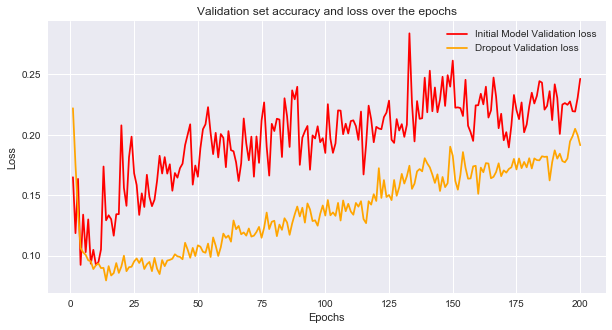

In [125]:

plt.figure(figsize=(10,5))

plt.plot(epochs, val_loss_values, 'r', label='Initial Model Validation loss')

plt.plot(epochs2, val_loss_values2, 'orange', label='Dropout Validation loss')
plt.title('Validation set accuracy and loss over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### This model has smaller loss. It performs much better than the initial model.

## iii. Weight regularization

In [119]:
from keras import regularizers

In [120]:
network3 = models.Sequential()
network3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(28*28,)))
network3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
network3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
network3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [121]:
history3 = network3.fit(images_train, labels_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(images_val, labels_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 189us/step - loss: 13.6221 - acc: 0.6697 - val_loss: 3.9296 - val_acc: 0.8096
Epoch 2/200
50000/50000 [==============================] - 9s 174us/step - loss: 3.0247 - acc: 0.7962 - val_loss: 2.5086 - val_acc: 0.7864
Epoch 3/200
50000/50000 [==============================] - 9s 182us/step - loss: 2.1899 - acc: 0.8340 - val_loss: 1.9403 - val_acc: 0.8700
Epoch 4/200
50000/50000 [==============================] - 10s 197us/step - loss: 1.8632 - acc: 0.8594 - val_loss: 1.7632 - val_acc: 0.8665
Epoch 5/200
50000/50000 [==============================] - 10s 193us/step - loss: 1.6687 - acc: 0.8796 - val_loss: 1.6063 - val_acc: 0.8815
Epoch 6/200
50000/50000 [==============================] - 11s 213us/step - loss: 1.5414 - acc: 0.8904 - val_loss: 1.4589 - val_acc: 0.9028
Epoch 7/200
50000/50000 [==============================] - 10s 201us/step - loss: 1.4497 - acc: 0.8996 - val_los

50000/50000 [==============================] - 8s 167us/step - loss: 0.9313 - acc: 0.9577 - val_loss: 0.9328 - val_acc: 0.9581
Epoch 60/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.9284 - acc: 0.9583 - val_loss: 0.9273 - val_acc: 0.9597
Epoch 61/200
50000/50000 [==============================] - 8s 169us/step - loss: 0.9268 - acc: 0.9599 - val_loss: 0.9264 - val_acc: 0.9609
Epoch 62/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.9270 - acc: 0.9589 - val_loss: 0.9246 - val_acc: 0.9601
Epoch 63/200
50000/50000 [==============================] - 9s 172us/step - loss: 0.9252 - acc: 0.9592 - val_loss: 0.9949 - val_acc: 0.9402
Epoch 64/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.9219 - acc: 0.9595 - val_loss: 0.9493 - val_acc: 0.9505
Epoch 65/200
50000/50000 [==============================] - 9s 184us/step - loss: 0.9233 - acc: 0.9583 - val_loss: 0.9128 - val_acc: 0.9621
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 8s 155us/step - loss: 0.8867 - acc: 0.9621 - val_loss: 0.9000 - val_acc: 0.9606
Epoch 118/200
50000/50000 [==============================] - 8s 155us/step - loss: 0.8857 - acc: 0.9628 - val_loss: 0.8933 - val_acc: 0.9589
Epoch 119/200
50000/50000 [==============================] - 8s 156us/step - loss: 0.8854 - acc: 0.9628 - val_loss: 0.9104 - val_acc: 0.9567
Epoch 120/200
50000/50000 [==============================] - 8s 166us/step - loss: 0.8843 - acc: 0.9630 - val_loss: 0.9210 - val_acc: 0.9533
Epoch 121/200
50000/50000 [==============================] - 8s 164us/step - loss: 0.8857 - acc: 0.9636 - val_loss: 0.9535 - val_acc: 0.9415
Epoch 122/200
50000/50000 [==============================] - 8s 159us/step - loss: 0.8859 - acc: 0.9628 - val_loss: 0.9390 - val_acc: 0.9468
Epoch 123/200
50000/50000 [==============================] - 8s 164us/step - loss: 0.8843 - acc: 0.9633 - val_loss: 0.9391 - val_acc: 0.9472
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 8s 155us/step - loss: 0.8684 - acc: 0.9642 - val_loss: 0.9068 - val_acc: 0.9519
Epoch 176/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.8698 - acc: 0.9638 - val_loss: 0.9142 - val_acc: 0.9520
Epoch 177/200
50000/50000 [==============================] - 8s 155us/step - loss: 0.8695 - acc: 0.9641 - val_loss: 0.9716 - val_acc: 0.9346
Epoch 178/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.8697 - acc: 0.9639 - val_loss: 0.9087 - val_acc: 0.9528
Epoch 179/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.8699 - acc: 0.9625 - val_loss: 0.8918 - val_acc: 0.9574
Epoch 180/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.8658 - acc: 0.9640 - val_loss: 0.9134 - val_acc: 0.9496
Epoch 181/200
50000/50000 [==============================] - 8s 154us/step - loss: 0.8676 - acc: 0.9644 - val_loss: 0.9265 - val_acc: 0.9492
Epoch 182/200
50000/50000 [

In [123]:
history_dict3 = history3.history

In [124]:
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']
acc3 = history_dict3['acc']
val_acc3 = history_dict3['val_acc']

epochs3 = range(1, len(acc3)+1)

In [141]:
network4 = models.Sequential()
network4.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28*28,)))
network4.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
network4.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
network4.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
network4.add(layers.Dense(10, activation='softmax'))

network4.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [142]:
history4 = network4.fit(images_train, labels_train,
                    epochs=200,
                    batch_size=512,
                    validation_data=(images_val, labels_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 12s 248us/step - loss: 1.8587 - acc: 0.8144 - val_loss: 1.0784 - val_acc: 0.9307
Epoch 2/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.8432 - acc: 0.9357 - val_loss: 0.6217 - val_acc: 0.9536
Epoch 3/200
50000/50000 [==============================] - 10s 195us/step - loss: 0.5376 - acc: 0.9505 - val_loss: 0.4062 - val_acc: 0.9710
Epoch 4/200
50000/50000 [==============================] - 9s 188us/step - loss: 0.3927 - acc: 0.9611 - val_loss: 0.3479 - val_acc: 0.9653
Epoch 5/200
50000/50000 [==============================] - 12s 249us/step - loss: 0.3255 - acc: 0.9662 - val_loss: 0.3291 - val_acc: 0.9597
Epoch 6/200
50000/50000 [==============================] - 12s 247us/step - loss: 0.2818 - acc: 0.9692 - val_loss: 0.3103 - val_acc: 0.9572
Epoch 7/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.2509 - acc: 0.9723 - val_lo

Epoch 59/200
50000/50000 [==============================] - 11s 223us/step - loss: 0.0937 - acc: 0.9915 - val_loss: 0.1448 - val_acc: 0.9763
Epoch 60/200
50000/50000 [==============================] - 11s 221us/step - loss: 0.0969 - acc: 0.9907 - val_loss: 0.1378 - val_acc: 0.9772
Epoch 61/200
50000/50000 [==============================] - 10s 193us/step - loss: 0.1048 - acc: 0.9883 - val_loss: 0.1370 - val_acc: 0.9786
Epoch 62/200
50000/50000 [==============================] - 9s 171us/step - loss: 0.0947 - acc: 0.9907 - val_loss: 0.1592 - val_acc: 0.9713
Epoch 63/200
50000/50000 [==============================] - 9s 173us/step - loss: 0.0940 - acc: 0.9911 - val_loss: 0.2397 - val_acc: 0.9501
Epoch 64/200
50000/50000 [==============================] - 9s 172us/step - loss: 0.0985 - acc: 0.9895 - val_loss: 0.1360 - val_acc: 0.9773
Epoch 65/200
50000/50000 [==============================] - 9s 173us/step - loss: 0.0914 - acc: 0.9916 - val_loss: 0.1780 - val_acc: 0.9660
Epoch 66/200
5000

50000/50000 [==============================] - 8s 166us/step - loss: 0.0828 - acc: 0.9917 - val_loss: 0.1408 - val_acc: 0.9769
Epoch 118/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.0796 - acc: 0.9928 - val_loss: 0.2686 - val_acc: 0.9446
Epoch 119/200
50000/50000 [==============================] - 10s 193us/step - loss: 0.0844 - acc: 0.9912 - val_loss: 0.1707 - val_acc: 0.9704
Epoch 120/200
50000/50000 [==============================] - 10s 193us/step - loss: 0.0804 - acc: 0.9922 - val_loss: 0.1521 - val_acc: 0.9717
Epoch 121/200
50000/50000 [==============================] - 11s 211us/step - loss: 0.0860 - acc: 0.9907 - val_loss: 0.1707 - val_acc: 0.9674
Epoch 122/200
50000/50000 [==============================] - 9s 178us/step - loss: 0.0832 - acc: 0.9914 - val_loss: 0.1319 - val_acc: 0.9788
Epoch 123/200
50000/50000 [==============================] - 10s 209us/step - loss: 0.0782 - acc: 0.9934 - val_loss: 0.1495 - val_acc: 0.9726
Epoch 124/200
50000/500

50000/50000 [==============================] - 9s 175us/step - loss: 0.0750 - acc: 0.9931 - val_loss: 0.1310 - val_acc: 0.9767
Epoch 176/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0781 - acc: 0.9925 - val_loss: 0.1419 - val_acc: 0.9752
Epoch 177/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0761 - acc: 0.9925 - val_loss: 0.1367 - val_acc: 0.9780
Epoch 178/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0776 - acc: 0.9920 - val_loss: 0.1249 - val_acc: 0.9784
Epoch 179/200
50000/50000 [==============================] - 9s 186us/step - loss: 0.0783 - acc: 0.9917 - val_loss: 0.1210 - val_acc: 0.9799
Epoch 180/200
50000/50000 [==============================] - 11s 229us/step - loss: 0.0766 - acc: 0.9922 - val_loss: 0.1554 - val_acc: 0.9727
Epoch 181/200
50000/50000 [==============================] - 11s 211us/step - loss: 0.0769 - acc: 0.9923 - val_loss: 0.1439 - val_acc: 0.9748
Epoch 182/200
50000/50000

In [143]:
history_dict4 = history4.history

In [144]:
loss_values4 = history_dict4['loss']
val_loss_values4 = history_dict4['val_loss']
acc4 = history_dict4['acc']
val_acc4 = history_dict4['val_acc']

epochs4 = range(1, len(acc4)+1)

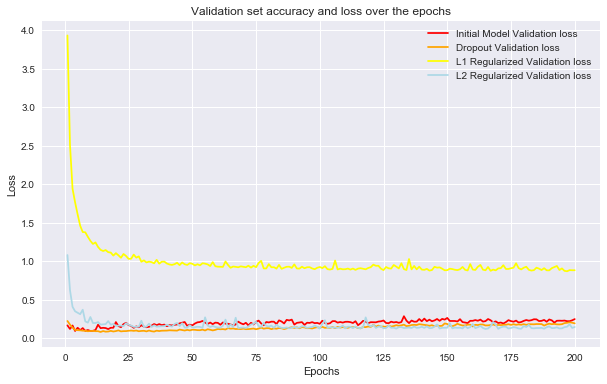

In [163]:
plt.figure(figsize=(10,6))
plt.plot(epochs, val_loss_values, 'r', label='Initial Model Validation loss')
plt.plot(epochs2, val_loss_values2, 'orange', label='Dropout Validation loss')
plt.plot(epochs3, val_loss_values3, 'yellow', label='L1 Regularized Validation loss')
plt.plot(epochs4, val_loss_values4, 'lightblue', label='L2 Regularized Validation loss')
plt.title('Validation set accuracy and loss over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## iV. Final Model

The best model is the one using dropout

In [153]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

train_labels = to_categorical(train_labels)

In [156]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

test_labels = to_categorical(test_labels)

In [154]:
best = models.Sequential()

best.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(10, activation='softmax'))

best.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_best = best.fit(train_images, train_labels, epochs=30, batch_size=512)

Epoch 1/30
60000/60000 [==============================] - 20s 326us/step - loss: 0.6578 - acc: 0.7832
Epoch 2/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.2446 - acc: 0.9306
Epoch 3/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.1868 - acc: 0.9473
Epoch 4/30
60000/60000 [==============================] - 20s 333us/step - loss: 0.1537 - acc: 0.9567
Epoch 5/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.1378 - acc: 0.9627
Epoch 6/30
60000/60000 [==============================] - 20s 339us/step - loss: 0.1203 - acc: 0.9669
Epoch 7/30
60000/60000 [==============================] - 19s 325us/step - loss: 0.1089 - acc: 0.9701
Epoch 8/30
60000/60000 [==============================] - 21s 343us/step - loss: 0.1016 - acc: 0.9715
Epoch 9/30
60000/60000 [==============================] - 21s 348us/step - loss: 0.0946 - acc: 0.9734
Epoch 10/30
60000/60000 [==============================] - 20s 340us/step - loss: 

In [158]:
test_loss, test_acc = best.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

10000/10000 [==============================] - 2s 156us/step
test_loss: 0.10376411337927334
test_acc: 0.98


#### My model performs a little better than the baseline from chapter 2.1.

In [167]:
best = models.Sequential()

best.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(512, activation='relu'))
best.add(layers.Dropout(0.5))
best.add(layers.Dense(10, activation='softmax'))

best.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

result_best = best.fit(train_images, train_labels, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.6656 - acc: 0.7834
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.2414 - acc: 0.9311
Epoch 3/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.1834 - acc: 0.9494
Epoch 4/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.1533 - acc: 0.9572
Epoch 5/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1352 - acc: 0.9621
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1184 - acc: 0.9672
Epoch 7/10
60000/60000 [==============================] - ETA: 0s - loss: 0.1079 - acc: 0.970 - 11s 189us/step - loss: 0.1078 - acc: 0.9705
Epoch 8/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1055 - acc: 0.9714
Epoch 9/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0945 - acc: 0.9743
Epoch 10/10
60000/60000 [===================